In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd

import os
import IPython.display

In [5]:
def load(file_name):
    wav = file_name
    file_sr = librosa.get_samplerate(wav)

    y, sr = librosa.load(wav, sr=file_sr)
    return y, sr

In [3]:
def add_noise(input_directory, output_directory, percent):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        #random_state = 42
        #rnd_state = np.random.RandomState(random_state)
        
        data = np.c_[y]
        mu = np.mean(data)
        sd = np.std(data)
        
        data_df = pd.DataFrame(data, columns=['Value'])
        data_df['Index'] = data_df.index.values
        
        ratio = np.random.uniform(0, percent)
        ratio = np.round(ratio * 100) / 100
        
        jitter = ratio*np.random.normal(mu, sd, size=data_df.shape[0])
        data_df['with_jitter'] = data_df['Value'] + jitter
        
        sf.write(output_directory +str(ratio)+"_"+file, data_df['with_jitter'], sr, subtype='PCM_16')

In [4]:
add_noise('final_ver7/train/', 'final_ver9/train/', 0.31)
add_noise('final_ver7/train_negative/', 'final_ver9/train_negative/', 0.31)

In [16]:
def add_more_noise(input_directory, noise_directory, output_directory, percent):
    
    origin_filelist = os.listdir(input_directory)
    noise_filelist = os.listdir(noise_directory)
    
    noises = []
    
    for n_file in noise_filelist:
        noises.append(n_file)
        
    count = len(noises)
    k = 0
    
    for o_file in origin_filelist:
        original, original_sr = load(input_directory + o_file)
        new_audio = []
        
        if(k >= count) :
            k = 0
        
        noise, noise_sr = load(noise_directory + noises[k])
        
        ratio = np.random.uniform(0, percent)
        ratio = np.round(ratio * 100) / 100
        
        
        for i in range(len(original)):
            new_audio.append((ratio*noise[i])+((1-ratio)*original[i]))
        
        sf.write(output_directory +str(ratio)+"_"+noises[k][:-4] + "_" + o_file, new_audio, 16000)
        
        k = k+1

In [23]:
add_more_noise('final_ver7/train/', 'noise/split/', 'final_ver11/train/', 0.31)
add_more_noise('final_ver7/train_negative/', 'noise/split/', 'final_ver11/train_negative/', 0.31)

In [18]:
for i in range(1000) :
    add_noise('a/1/', 'a/2/', 0.31)

In [70]:
y, sr = load('test.wav')

data = np.c_[y]
mu = np.mean(data)
sd = np.std(data)

print(mu, sd)

data_df = pd.DataFrame(data, columns=['Value'])
data_df['Index'] = data_df.index.values

random_state = 42
rnd_state = np.random.RandomState(random_state)

ratio = np.random.uniform(0.05, 0.3)
ratio = round(ratio, 2)
    
jitter = 0.3*rnd_state.normal(mu, sd, size=data_df.shape[0])
data_df['with_jitter'] = data_df['Value'] + jitter

5.4923057e-05 0.07208886


In [44]:
np.random.normal(5.4923057e-05,0.07208886)

-0.19463261652483654

In [45]:
np.random.RandomState(42).normal(0,1)

0.4967141530112327

In [23]:
np.random.RandomState(42).normal()

0.4967141530112327

In [27]:
np.random.normal(5.4923057e-05,0.07208886)

0.003567871319669775

In [47]:
jitter

array([ 0.0043035 , -0.00118949,  0.00560953, ...,  0.0068409 ,
        0.0040329 ,  0.0057629 ])

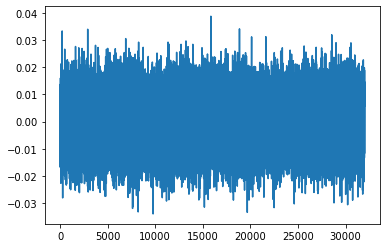

In [48]:
plt.plot(jitter)

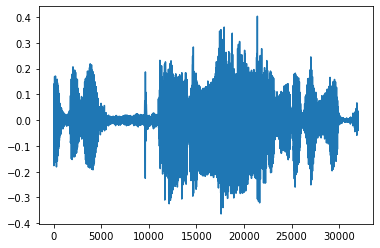

In [49]:
plt.plot(y)

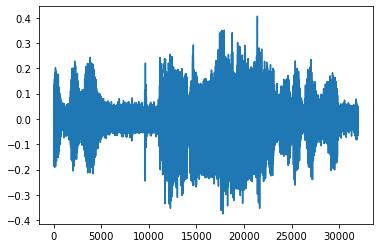

In [61]:
plt.plot(data_df['with_jitter'])

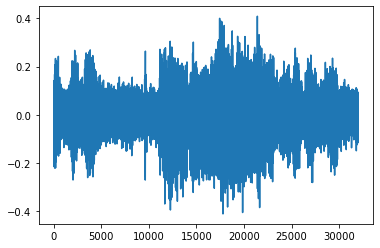

In [67]:
plt.plot(data_df['with_jitter'])

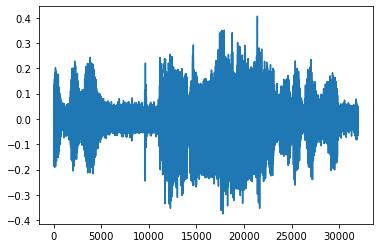

In [69]:
plt.plot(data_df['with_jitter'])

In [56]:
sf.write('test_noise.wav', data_df['with_jitter'], sr, subtype='PCM_16')